# Introduction

In recent years, we are evident of several changes in the music industry. Some of these changes can be associated to the consumers- as the magnitude and platforms of consumption grew. At the same time, innovations on behalf of the artists led to new genres of music to arise. One outcome of said changes is the rising presence of explicit lyrical content within the songwriting process.

Thus, in the scope of this project, we wanted to test whether having explicit lyrics has any considerable effect on the popularity of the song.

Hence, we can formulate the following wuestion: "Does the presence of explicit content in a song's lyrics increase its popularity?".

## Explicit Content  

Regarding the definition of "explicit lyrical content", there is no general consensus. Obviously, culture has a major effect on the matter, with lots of considerations about the intended audience and the listening context.

As of today, the decision regarding the presence of explicit content in songs lyrics is done mostly by humans. This can be done by either the rights-holders of the song who who inform the different platforms (Spotify, YouTube etc.), or by user based flagging when consuming the content.

## Songs Popularity

Generally speaking, the popularity of a song can be measured by the amount of times it has been listened to by the public. One key observation to make is the rise of different platforms one can use to listen to music. 

In the beggining-middle of the 20th century, the main platforms were the radio and sales of physical copies of songs, where as today we have online streaming platforms and apps. Since 1958, the "Billboard Hot 100" weekly chart has been considered by many as the concensus for most popular songs. 

These days, these chart rankings approximate weighting is 35-45% for sales, 30-40% for airplay, and 20-30% for streaming. An annual "year end" chart is also released, ranking that year's songs by calculating a cumulative total of sales, airplay, and streaming


We believe our research will show that explicit content has a positive effect on the popularity of a given song. I.e., a song which contains explicit lyrical content will have a higher chance of being popular. 
????????????????????? Add why we believe this is the case ???????????????????????????????


# Data

In this project, we will use the following [data](https://www.kaggle.com/datasets/ektanegi/spotifydata-19212020).
This data-set contains approximately 169,000 songs from Spotify, spanning between 1921 and 2020. For each year, the top 100 songs - according to spotify - were recorded.

For each song, we have several types of features such as song charactaristic (e.g., tempo and danceability), and general information regarding the song (e.g., artist name, published year and song name).

## Defining the Treatment and Effect

As per our causal question formulation, the treatment and effect are the 'explicit ' and 'popularity' columns of the data respectivally.

The popularity column is Spotify's popularity rating index, which ranges from 0-100.
The explicit column is Spotify's explicit content flag, ehich is binary (0 = No explicit content, 1 = Explicit content)

As for this point forward, these columns will be reffered as treatment and effect. 

## Data Preprocessing

In this section, we removed columns which were irrelevant for our research question.
Firstly, we removed the 'id' as it is only an identifier for a record, and has no influence.
Moreover, since the song name doesnt effect neither the popularity nor the presence of explicit content in the lyrics, it was removed as well.  We also removed the full release date feture, as we were only interested in the year of publishing, which was an individual feature present in the data. The month and day were not as important.

## Data Transformation

As to the artists of the song, we believe that it has an effect on both the potential presence of explicit lyrics in the song, and on the potential populrity of a song.
Usually, an artist has a signature style of music, which can be characarized with the presence of explicit lyrics - such as rap and hip-hop. In addition, an artist can enjoy the attention of the public, and can gain an interest about a future song, even before publishing it. Thus, we need to find a way to endoce the artist into the data , as it is a confounding element in our opinion.

Yet, there are several thousands different artist, so a plain one-hot encoding was not applicable.
Our solution to this problem is as follows: firstly, we used only the main artist of every song (in the case of collaborations), and for every song, we estimated the popularity and tendency to explicit content by averaging those parameters across past songs of the main artist.

In [19]:
import pandas as pd

In [20]:
df = pd.read_csv('data/spotify1921-2020.csv')
df

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.3060,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.2700,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.1530,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.7610,0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.4720,2020


In [21]:
# to extract information from the artists column, without having to add a one-hot encoding for each artist (4000+)
# we will instead, try to extract a "popularity" and "explicitness" for each song based on the artists that are associated with it
# we will do this by taking the average popularity and explicit of all the previous songs from the artists that are associated with it
# we take only the first artist as the main artist
df['artists'] = df['artists'].apply(lambda x: x[0])
df = df.sort_values(by=['artists', 'year'])
# 2234 is the max amount of songs by an artist
df['previous_artist_explicitness'] = df.groupby('artists')['explicit'].transform(lambda x: x.shift(1).rolling(2234, min_periods=1).mean()).fillna(0)
df['previous_artist_popularity'] = df.groupby('artists')['popularity'].transform(lambda x: x.shift(1).rolling(2234, min_periods=1).mean()).fillna(0)
df = df.drop(columns=['artists'])
df

,acousticness,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,previous_artist_explicitness,previous_artist_popularity
78068,0.7320,0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,7,1921,0.4150,60.936,0.9630,1921,0.000000,0.000000
78069,0.9820,0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",5,1921,0.0366,80.954,0.0594,1921,0.000000,7.000000
78070,0.9410,0.241,196307,0.274,0,4aVy85Y2sxMwIKmAcimHp0,0.000008,0,0.0984,-9.750,0,How Can You Buy Killarny,2,1921,0.0297,90.773,0.2120,1921,0.000000,6.000000
78071,0.9570,0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665,0.2530,1921,0.000000,4.666667
78072,0.9960,0.518,159507,0.203,0,5uNZnElqOS3W4fRmRYPk4T,0.000000,0,0.1150,-10.589,1,The Wearing of the Green,5,1921,0.0615,66.221,0.4060,1921,0.000000,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,0.875,163800,0.443,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.3060,2020,0.478514,64.578335
169905,0.0167,0.719,167468,0.385,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.2700,2020,0.478514,64.580573
169906,0.5380,0.514,180700,0.539,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.1530,2020,0.478514,64.576097
169907,0.0714,0.646,167308,0.761,0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.4720,2020,0.478514,64.575649


In [22]:
# we remove the release_date column as its format is not consistent across all records
# some records have the complete date, some have the year only - we take the year only
df = df.drop(columns=['release_date'])
# we remove id, song name and artist name as they are not useful for our analysis
df = df.drop(columns=['id', 'name'])

# we mark our treatment as the "explicit" column and our effect as the popularity column
# (treatment is binary and popularity ranges from 0 to 100)
df = df.rename(columns={'explicit': 'treatment', 'popularity': 'effect'})
# reorder all the columns
df = pd.concat([df.loc[:, ~df.columns.isin(['treatment', 'effect'])], df.loc[:, ['treatment', 'effect']]], axis=1)
df

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,year,previous_artist_explicitness,previous_artist_popularity,treatment,effect
78068,0.7320,0.819,180533,0.341,0.000000,7,0.1600,-12.441,1,0.4150,60.936,0.9630,1921,0.000000,0.000000,0,7
78069,0.9820,0.279,831667,0.211,0.878000,10,0.6650,-20.096,1,0.0366,80.954,0.0594,1921,0.000000,7.000000,0,5
78070,0.9410,0.241,196307,0.274,0.000008,0,0.0984,-9.750,0,0.0297,90.773,0.2120,1921,0.000000,6.000000,0,2
78071,0.9570,0.418,166693,0.193,0.000002,3,0.2290,-10.096,1,0.0380,101.665,0.2530,1921,0.000000,4.666667,0,2
78072,0.9960,0.518,159507,0.203,0.000000,0,0.1150,-10.589,1,0.0615,66.221,0.4060,1921,0.000000,4.000000,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,0.875,163800,0.443,0.000032,1,0.0891,-7.461,1,0.1430,100.012,0.3060,2020,0.478514,64.578335,1,75
169905,0.0167,0.719,167468,0.385,0.031300,8,0.1110,-10.907,1,0.0403,128.000,0.2700,2020,0.478514,64.580573,0,64
169906,0.5380,0.514,180700,0.539,0.002330,7,0.1080,-9.332,1,0.1050,123.700,0.1530,2020,0.478514,64.576097,0,70
169907,0.0714,0.646,167308,0.761,0.000000,1,0.2220,-2.557,1,0.0385,129.916,0.4720,2020,0.478514,64.575649,0,70


After all the transformation and pre-processing, the main features we will use in the project are:
-
-
-


# Data Analysis and Statistics

In [23]:
df.describe(percentiles=[]).iloc[1:]

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,year,previous_artist_explicitness,previous_artist_popularity,treatment,effect
mean,0.493214,0.538150,2.314062e+05,0.488593,0.161937,5.200519,0.206690,-11.370289,0.708556,0.094058,116.948017,0.532095,1977.223231,0.081897,31.148843,0.084863,31.556610
std,0.376627,0.175346,1.213219e+05,0.267390,0.309329,3.515257,0.176796,5.666765,0.454429,0.149937,30.726937,0.262408,25.593168,0.104377,19.515174,0.278679,21.582614
min,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,1921.000000,0.000000,0.000000,0.000000,0.000000
50%,0.492000,0.548000,2.086000e+05,0.481000,0.000204,5.000000,0.135000,-10.474000,1.000000,0.045000,114.778000,0.544000,1978.000000,0.027305,35.320054,0.000000,33.000000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,0.969000,244.091000,1.000000,2020.000000,0.483438,69.754700,1.000000,100.000000


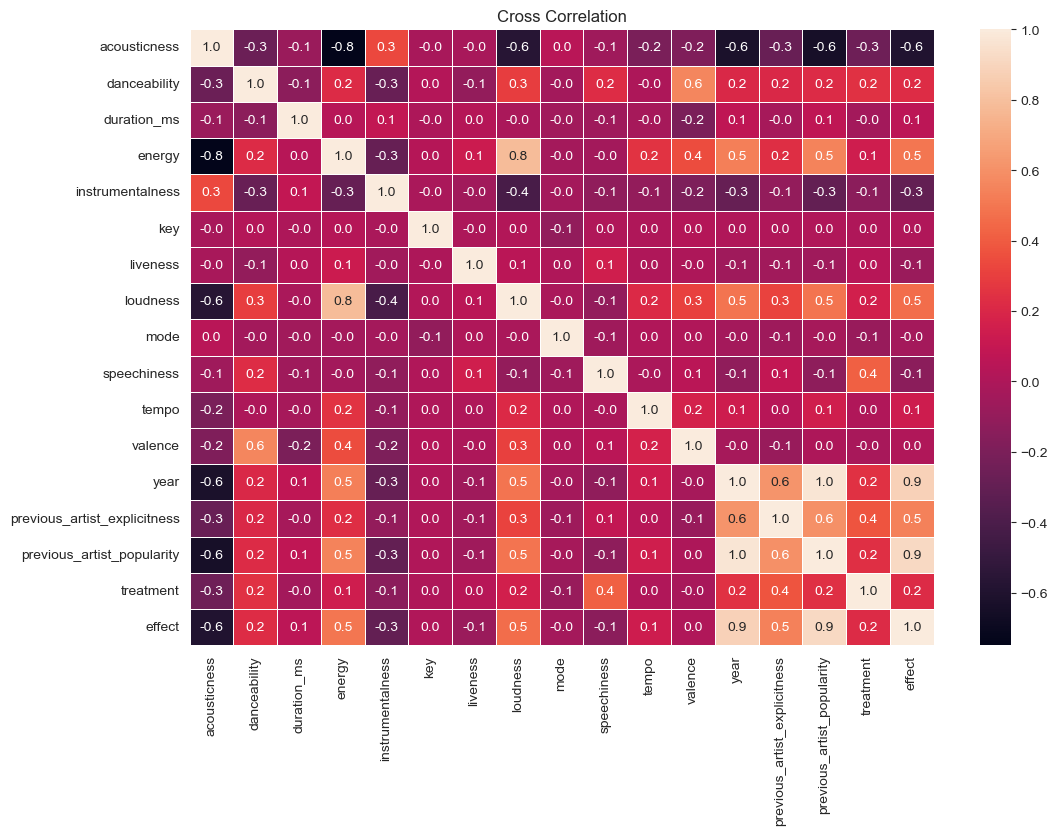

In [24]:
# cross correlation between our features, the treatment and the effect
# plot as matplotlib heatmap
import matplotlib.pyplot as plt
import seaborn as sns
_, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax)
ax.title.set_text('Cross Correlation')
plt.show()

From the chart above, we can see several interesting phenomenas regarding the relation betweeen the different features, treatment and effect. Firstly, we can see that the effect is highly positively-correlated with the publishing year of the song. This result supports the recent trend of increasing the usage of explicit content in the music industry.
We can also see that features like energy and loudness are somewhat positively correlated with the effect, and that accousticness is has the opposite trend. These results also logical, as these features are commonly associated with genres which are usually known for the presence or lack of explicit content. 

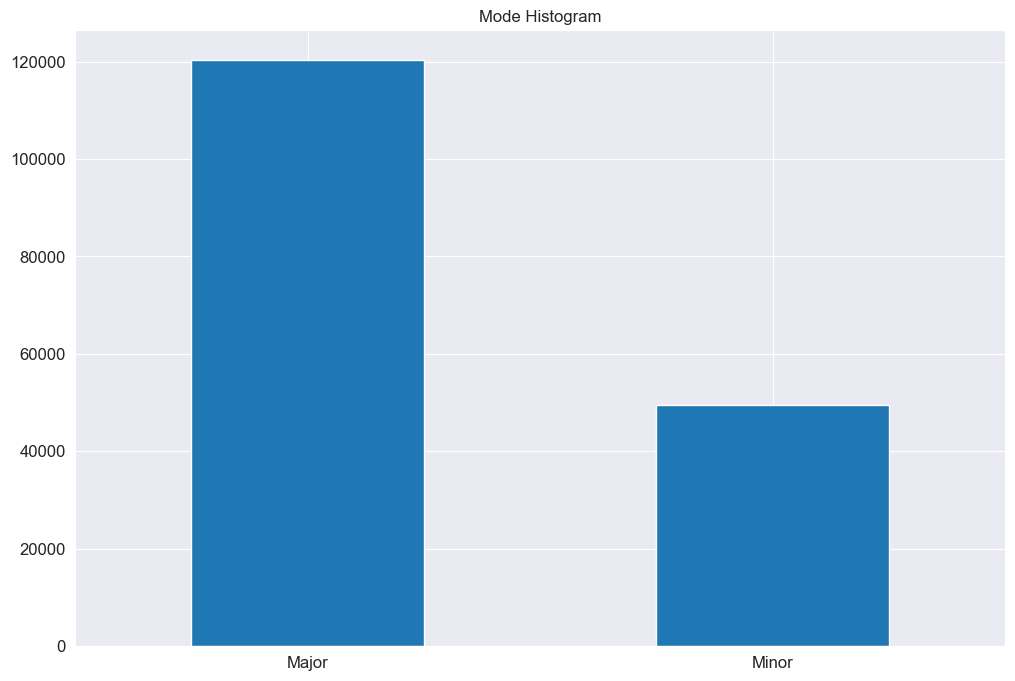

In [25]:
# plot histogram of mode column
_, ax = plt.subplots(figsize=(14, 10))
df['mode'].value_counts().plot(kind='bar', title='Mode Histogram', figsize=(12, 8), fontsize=12, ax=ax)
plt.xticks(rotation=0)
ax.set_xticklabels(['Major', 'Minor'])
plt.show()

As we can see, the mode is mostly major

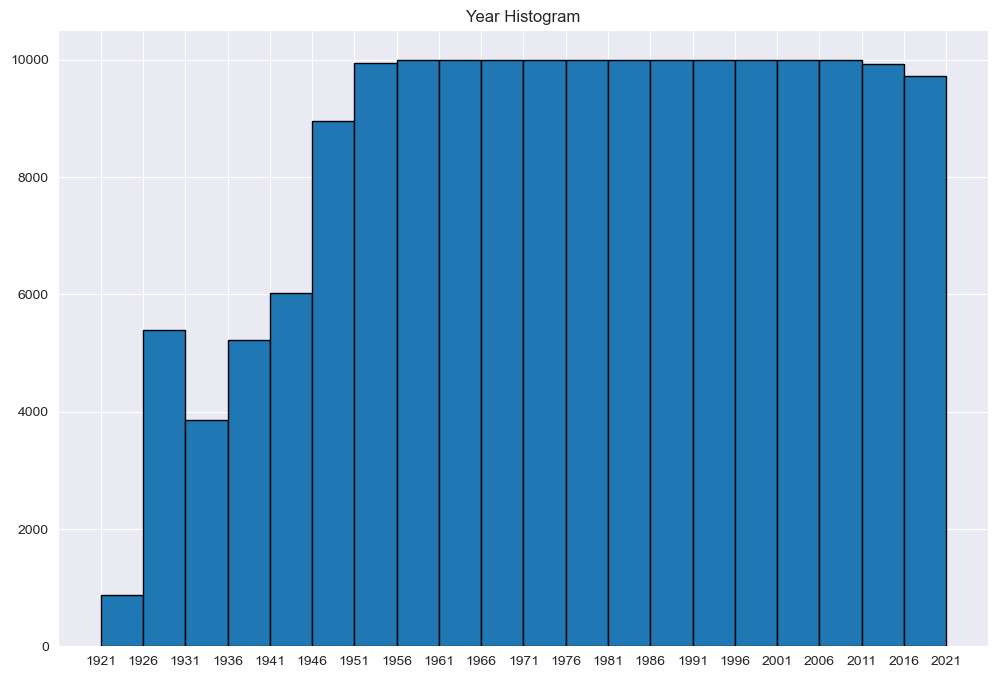

In [26]:
# plot histogram of year column
_, ax = plt.subplots(figsize=(12, 8))
bins = list(range(1921, 2022, 5))
plt.hist(df.year.values, bins=bins, edgecolor="k")
plt.xticks(bins)
ax.title.set_text('Year Histogram')
plt.show()

The amount of records per year is capped at 2,000 (data includes top 2000 songs of each year)
As we can see, early years have a lower number of records, and also the last 10 years has little less records (the difference is not significant)

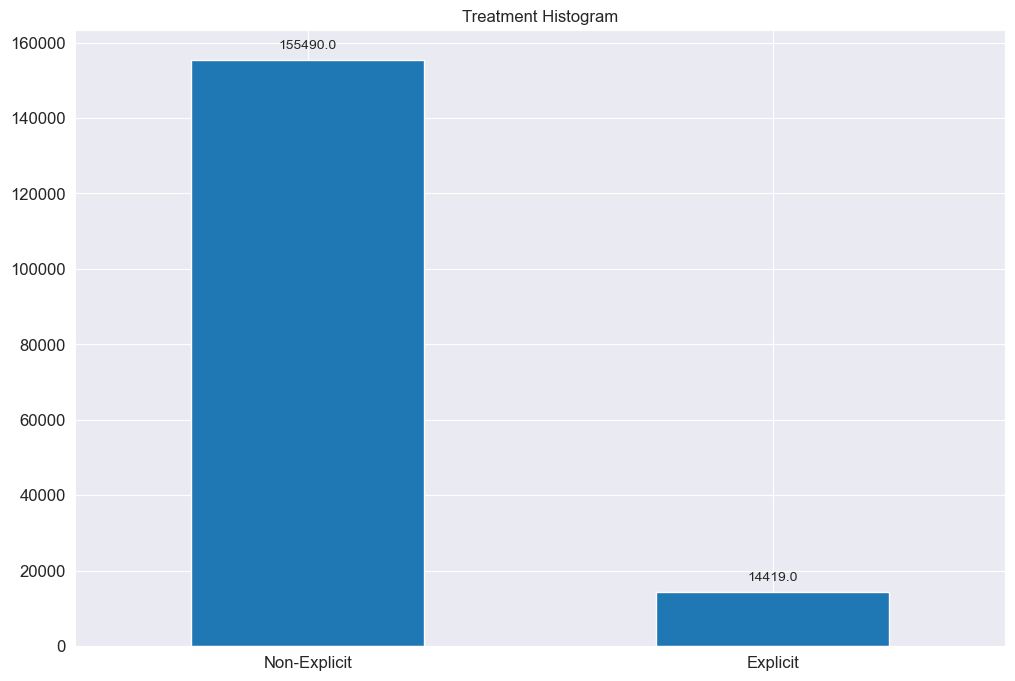

In [27]:
# plot histogram of treatment column
_, ax = plt.subplots(figsize=(12, 8))
df['treatment'].value_counts().plot(kind='bar', title='Treatment Histogram', figsize=(12, 8), fontsize=12, ax=ax)
plt.xticks(rotation=0)
ax.set_xticklabels(['Non-Explicit', 'Explicit'])
# add values to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

As we can see, the treatment is mostly non-explicit, however, there are around 14K records, which will be enough for our analysis

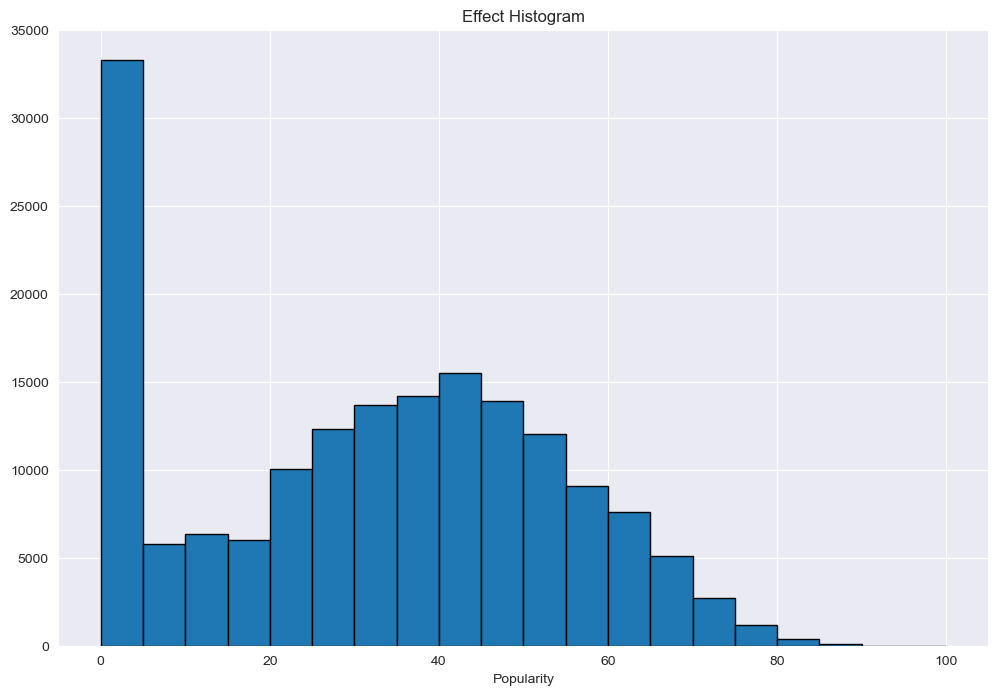

In [28]:
# plot histogram of effect column
_, ax = plt.subplots(figsize=(12, 8))
bins = list(range(0, 101, 5))
plt.hist(df.effect.values, bins=bins, edgecolor="k")
ax.set_xlabel('Popularity')
plt.xticks(rotation=0)
ax.title.set_text('Effect Histogram')
plt.show()

As we can see, there is a high value for 0-5, however, the distribution is still normal with median around 45-50
This sets the question, why are there so many records with popularity 0-5?
we will check in the next graph, whether it is because early years have lower popularity (due to unrecorded popularity maybe)

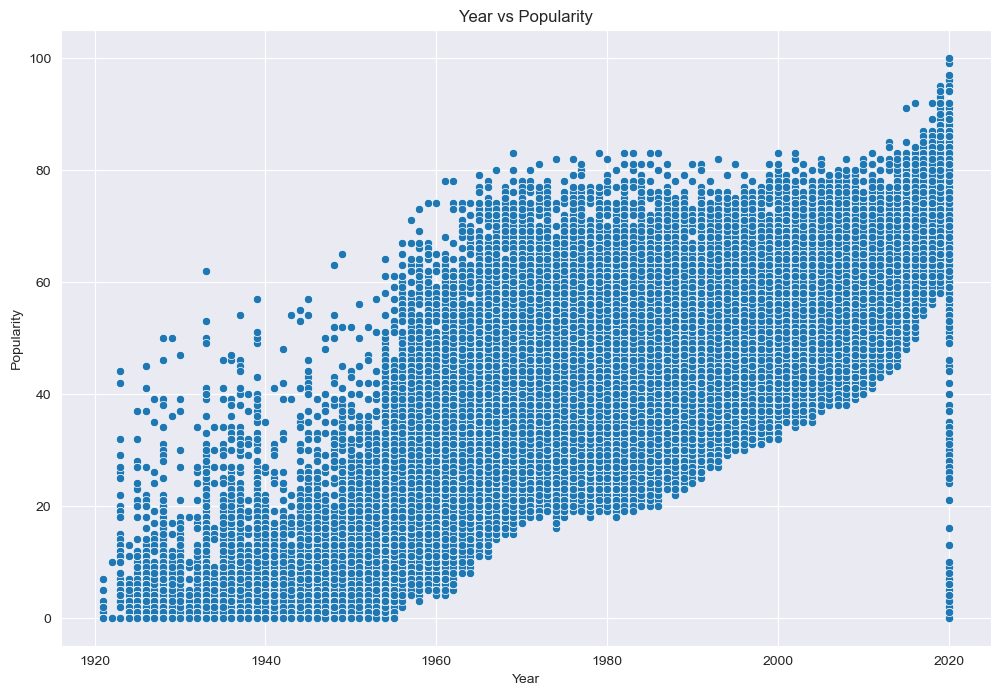

In [29]:
#  plot of year vs effect
_, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x='year', y='effect', data=df, ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('Popularity')
ax.title.set_text('Year vs Popularity')
plt.show()

As we can see, the popularity is lower in the early years, but they still have a range of values and not just 0, so we take them all

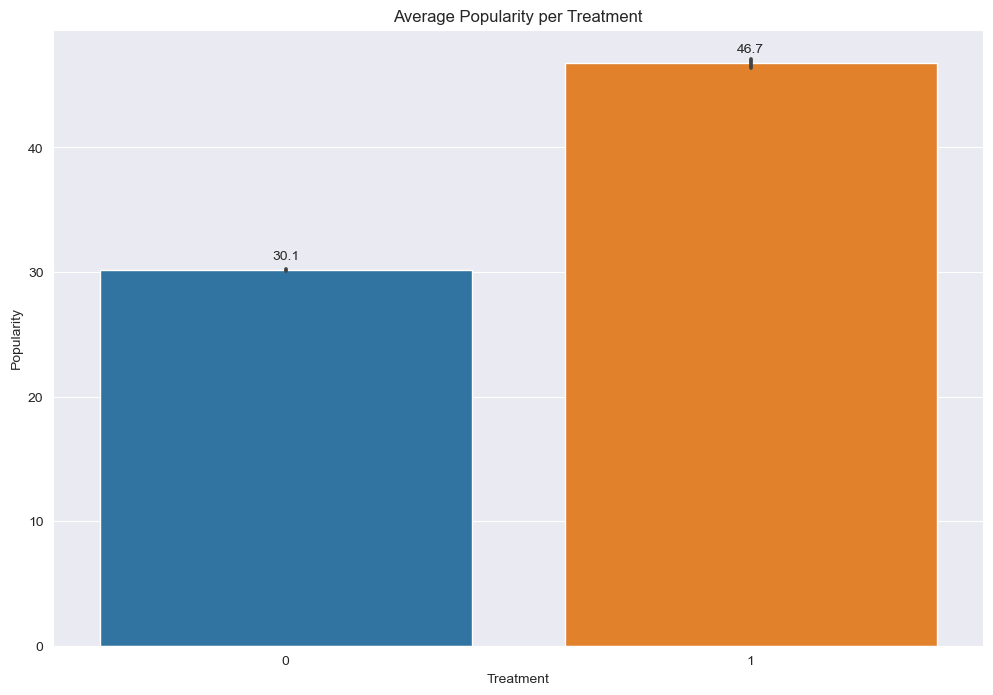

In [30]:
# plot average effect per treatment
_, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='treatment', y='effect', data=df, ax=ax)
ax.set_xlabel('Treatment')
ax.set_ylabel('Popularity')
ax.title.set_text('Average Popularity per Treatment')
# add values to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

Lastly, we can see that the average popularity is higher for explicit than for non-explicit, hence, we might indeed witness that the treatment affects the effect

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

def calculate_propensity_score(df):
    scaled = StandardScaler().fit_transform(df.drop(['effect', 'treatment'], axis=1))
    LR = LogisticRegression(random_state=0)
    LR.fit(scaled, df['treatment'])
    prop = LR.predict_proba(scaled)[:, 1]

    return prop

# calculate propensity score
df['propensity_score'] = calculate_propensity_score(df)

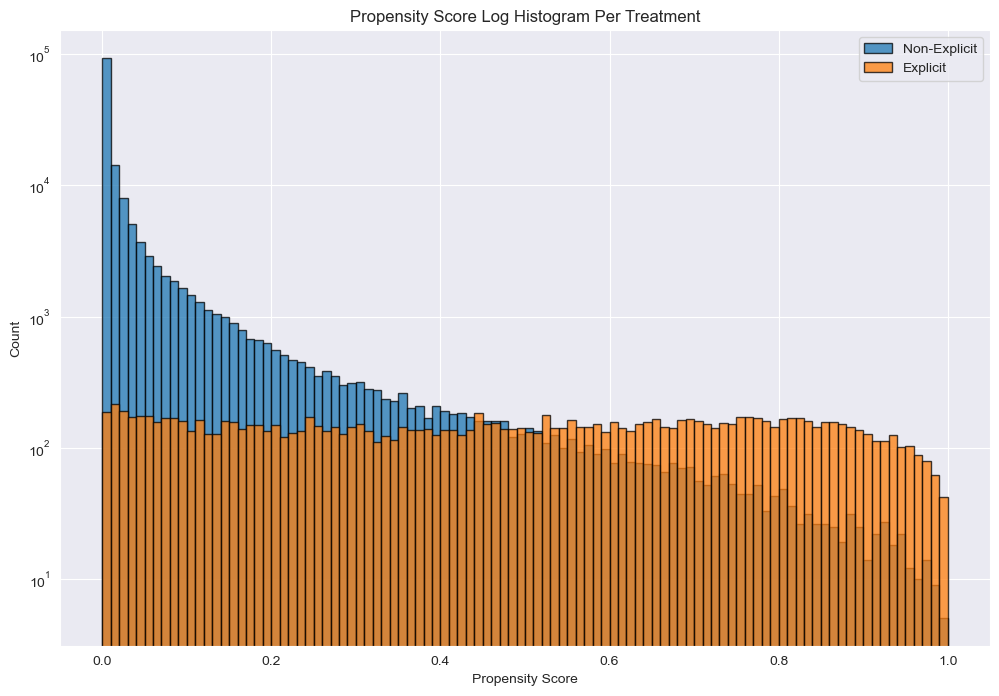

In [37]:
# plot propensity score histogram stacked by treatment, log scale
import numpy as np
_, ax = plt.subplots(figsize=(12, 8))
bins = np.arange(0, 1.01, 0.01)
plt.hist(df.propensity_score[df.treatment == 0].values, bins=bins, edgecolor="k", log=True, alpha=0.75, label='Non-Explicit')
plt.hist(df.propensity_score[df.treatment == 1].values, bins=bins, edgecolor="k", log=True, alpha=0.75, label='Explicit')
ax.set_xlabel('Propensity Score')
ax.set_ylabel('Count')
ax.title.set_text('Propensity Score Log Histogram Per Treatment')
ax.legend()
plt.show()

In [34]:
df.to_csv('data/final_data.csv', index=False)

In [35]:
df

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,year,previous_artist_explicitness,previous_artist_popularity,treatment,effect,propensity_score
78068,0.7320,0.819,180533,0.341,0.000000,7,0.1600,-12.441,1,0.4150,60.936,0.9630,1921,0.000000,0.000000,0,7,0.005415
78069,0.9820,0.279,831667,0.211,0.878000,10,0.6650,-20.096,1,0.0366,80.954,0.0594,1921,0.000000,7.000000,0,5,0.000009
78070,0.9410,0.241,196307,0.274,0.000008,0,0.0984,-9.750,0,0.0297,90.773,0.2120,1921,0.000000,6.000000,0,2,0.000089
78071,0.9570,0.418,166693,0.193,0.000002,3,0.2290,-10.096,1,0.0380,101.665,0.2530,1921,0.000000,4.666667,0,2,0.000148
78072,0.9960,0.518,159507,0.203,0.000000,0,0.1150,-10.589,1,0.0615,66.221,0.4060,1921,0.000000,4.000000,0,5,0.000171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,0.875,163800,0.443,0.000032,1,0.0891,-7.461,1,0.1430,100.012,0.3060,2020,0.478514,64.578335,1,75,0.833833
169905,0.0167,0.719,167468,0.385,0.031300,8,0.1110,-10.907,1,0.0403,128.000,0.2700,2020,0.478514,64.580573,0,64,0.561083
169906,0.5380,0.514,180700,0.539,0.002330,7,0.1080,-9.332,1,0.1050,123.700,0.1530,2020,0.478514,64.576097,0,70,0.231453
169907,0.0714,0.646,167308,0.761,0.000000,1,0.2220,-2.557,1,0.0385,129.916,0.4720,2020,0.478514,64.575649,0,70,0.537738
